## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [1]:
# YOUR CODE HERE
#načítanie dátového rámca:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()

In [2]:
data_telecom = pd.read_csv("../data/Telecom-Churn.csv")
print(data_telecom.shape)
print(data_telecom.columns)

(7043, 22)
Index(['Unnamed: 0', 'CustomerID', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [3]:
data_telecom.head()

,Unnamed: 0,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#odstránenie nepotrebných atribútov:

data_telecom = data_telecom.drop(columns=["Unnamed: 0", "CustomerID"])

In [5]:
data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print(data_telecom.shape)
print(data_telecom.columns)

(7043, 20)
Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [7]:
# YOUR CODE HERE
#2/1.a. základné štatistiky pre číselné atribúty: SeniorCitizen podľa mňa tam nemá byť, je to binárny atribút. Asi nejaká chyba vo formáte buniek.

data_telecom.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7017.000000,7032.000000
mean,0.162147,32.371149,64.707482,2283.300441
std,0.368612,24.559481,30.105503,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,401.450000
50%,0.000000,29.000000,70.300000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


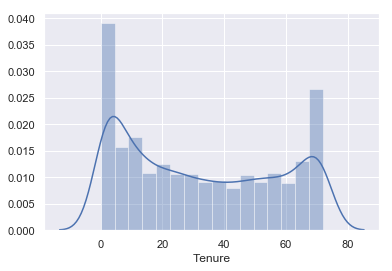

In [8]:
#2/1.b. distribúcia pravdepodobnosti výskytu hodnôt: 
#pre MonthlyCharges a TotalCharges dostanem chybovú hlášku (predpokladám, že kvôli chýbajúcim hodnotám)

g = sns.distplot(data_telecom['Tenure'])
#g = sns.distplot(data_telecom['MonthlyCharges'])
#g = sns.distplot(data_telecom['TotalCharges'])

In [9]:
#2/2.a. početnosť hodnôt pre nominálne / ordinálne atribúty:

#data_telecom['Gender'].value_counts()
#data_telecom['InternetService'].value_counts()
data_telecom['Contract'].value_counts()
#data_telecom['PaymentMethod'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

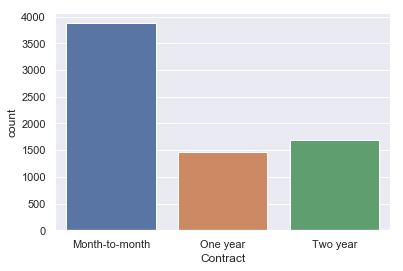

In [10]:
#2/2.b. histogram pre nominálne / ordinálne atribúty:

#g = sns.countplot(y='Gender', data=data_telecom)
#g = sns.countplot(x='InternetService', data=data_telecom)
g = sns.countplot(x='Contract', data=data_telecom)
#g = sns.countplot(data_telecom['PaymentMethod'])

In [11]:
#2/3. počet chýbajúcich hodnôt:

data_telecom.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        11
Churn                0
dtype: int64

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [12]:
# YOUR CODE HERE

factors = data_telecom[["Tenure", "MonthlyCharges", "TotalCharges"]]
corr_table = factors.corr()
corr_table

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247732,0.825880
MonthlyCharges,0.247732,1.000000,0.651316
TotalCharges,0.825880,0.651316,1.000000


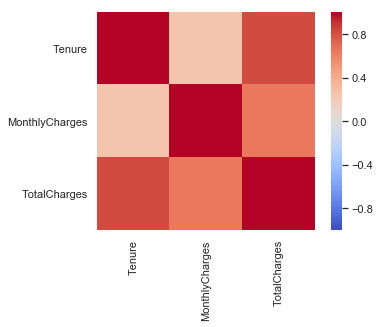

In [13]:
p = sns.heatmap(corr_table,
               xticklabels=corr_table.columns, yticklabels=corr_table.columns,
               vmin=-1, vmax=1,
                cmap='coolwarm',
                square=True)

In [ ]:
#najviac kolerované sú atribúty Tenure a TotalCharges, čiže ako dlho je zákazníkom a celková výška platby

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [14]:
# YOUR CODE HERE
#4.a. diskretizácia atribútu MonthlyCharges a TotalCharges do 5 rovnako veľkých intervalov:

data_telecom["MonthlyCharges_ordinal"] = pd.cut(data_telecom["MonthlyCharges"], 5)
data_telecom["MonthlyCharges_ordinal"].value_counts()

(78.55, 98.65]     1817
(18.15, 38.35]     1797
(58.45, 78.55]     1361
(98.65, 118.75]    1042
(38.35, 58.45]     1000
Name: MonthlyCharges_ordinal, dtype: int64

In [15]:
data_telecom["TotalCharges_ordinal"] = pd.cut(data_telecom["TotalCharges"], 5)
data_telecom["TotalCharges_ordinal"].value_counts()

(10.134, 1752.0]    3937
(1752.0, 3485.2]    1179
(3485.2, 5218.4]     866
(5218.4, 6951.6]     705
(6951.6, 8684.8]     345
Name: TotalCharges_ordinal, dtype: int64

In [16]:
#4.b. diskretizácia atribútu Tenure na 5 intervalov s rovnakou početnosťou príkladov:

data_telecom["Tenure_ordinal"] = pd.qcut(data_telecom["Tenure"], 5)
data_telecom["Tenure_ordinal"].value_counts()

(-0.001, 6.0]    1481
(20.0, 40.0]     1408
(60.0, 72.0]     1407
(6.0, 20.0]      1397
(40.0, 60.0]     1350
Name: Tenure_ordinal, dtype: int64

### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [17]:
# YOUR CODE HERE
#5/1a: diskretizácia hodnôt Tenure do intervalov [0-12), [12-24), [24-48), [48-72), kedže max. hodnota je 72 mesiacov

data_telecom["Tenure_ordinal"]=pd.cut(data_telecom["Tenure"], bins=[0, 12, 24, 48, 72], labels=["<1 year", "1-2 years", "2-4 years", "4-6 years"])
data_telecom["Tenure_ordinal"].value_counts()

4-6 years    2239
<1 year      2175
2-4 years    1594
1-2 years    1024
Name: Tenure_ordinal, dtype: int64

In [18]:
#5/1a: kontingenčná tabuľka - závislosť medzi atribútmi Tenure, MonthlyCharges, TotalCharges a Churn

pd.pivot_table(data_telecom, index=["Churn", "Tenure_ordinal"], values=["MonthlyCharges", "TotalCharges"], aggfunc=["median", "mean", "min", "max", "count"])

median                        mean               \
                     MonthlyCharges TotalCharges MonthlyCharges TotalCharges   
Churn Tenure_ordinal                                                           
No    <1 year                45.325      183.600      46.701235   265.768146   
      1-2 years              55.300      980.475      54.326479  1018.113493   
      2-4 years              64.000     2193.000      61.084545  2233.539007   
      4-6 years              80.300     4893.925      71.980426  4596.847878   
Yes   <1 year                73.850      164.500      66.466409   288.532064   
      1-2 years              84.450     1383.725      78.475768  1394.778401   
      2-4 years              89.150     2896.400      84.607276  3003.136462   
      4-6 years              99.900     5643.400      92.171127  5528.802582   

                                min                         max               \
                     MonthlyCharges TotalCharges MonthlyCharges TotalCharges   
Churn Tenure_ordinal                                                           
No    <1 year                 18.75        18.80         111.40      1275.65   
      1-2 years               18.80       218.55         112.95      2494.65   
      2-4 years               18.25       383.65         116.25      5443.65   
      4-6 years               18.40       900.90         118.75      8672.45   
Yes   <1 year                 18.85        18.85         112.95      1384.75   
      1-2 years               19.40       288.05         111.20      2542.45   
      2-4 years               19.55       655.85         117.45      5438.90   
      4-6 years               19.35      1021.80         118.35      8684.80   

                              count               
                     MonthlyCharges TotalCharges  
Churn Tenure_ordinal                              
No    <1 year                  1134         1138  
      1-2 years                 727          730  
      2-4 years                1265         1269  
      4-6 years                2018         2026  
Yes   <1 year                  1033         1037  
      1-2 years                 293          294  
      2-4 years                 323          325  
      4-6 years                 213          213

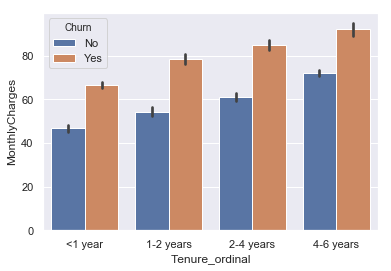

In [19]:
#5/1b: vizualizácia pomocou Seaborn:

g = sns.barplot(x='Tenure_ordinal', y='MonthlyCharges', hue="Churn", data=data_telecom)

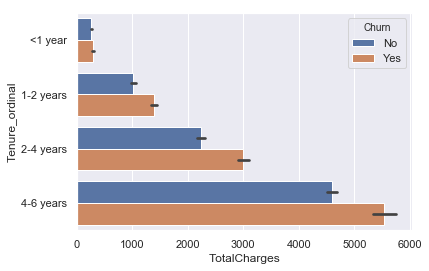

In [20]:
g = sns.barplot(x='TotalCharges', y='Tenure_ordinal', hue="Churn", data=data_telecom)

In [21]:
#5/2a: závislosť medzi atribútmi Gender, SeniorCitizen a Churn

pd.crosstab(index=[data_telecom["Churn"], data_telecom["SeniorCitizen"]], columns=data_telecom["Gender"])

Gender               Female  Male
Churn SeniorCitizen              
No    0                2221  2287
      1                 328   338
Yes   0                 699   694
      1                 240   236

In [22]:
#5/3a: početnosť rôznych kombinácií služieb pre atribúty PhoneService, InternetService, StreamingTV, StreamingMovies.

pd.crosstab(columns=data_telecom["InternetService"], index=[data_telecom["PhoneService"], data_telecom["StreamingTV"], data_telecom["StreamingMovies"]])

InternetService                                       DSL  Fiber optic    No
PhoneService StreamingTV         StreamingMovies                            
No           No                  No                   299            0     0
                                 Yes                   98            0     0
             Yes                 No                    85            0     0
                                 Yes                  200            0     0
Yes          No                  No                   814          905     0
                                 Yes                  253          441     0
             No internet service No internet service    0            0  1526
             Yes                 No                   242          440     0
                                 Yes                  430         1310     0

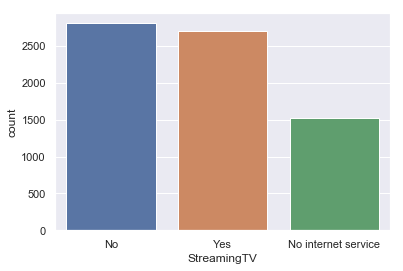

In [23]:
#vizualizácia pomocou Seaborn knižnice:

#g = sns.countplot(x="PhoneService", data=data_telecom)
#g = sns.countplot(x="InternetService", data=data_telecom)
g = sns.countplot(x="StreamingTV", data=data_telecom)
#g = sns.countplot(x="StreamingMovies", data=data_telecom)

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [24]:
# YOUR CODE HERE
data_telecom.isna().sum()

Gender                     0
SeniorCitizen              0
Partner                    0
Dependents                20
Tenure                     0
PhoneService               0
MultipleLines              0
InternetService            0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges            26
TotalCharges              11
Churn                      0
MonthlyCharges_ordinal    26
TotalCharges_ordinal      11
Tenure_ordinal            11
dtype: int64

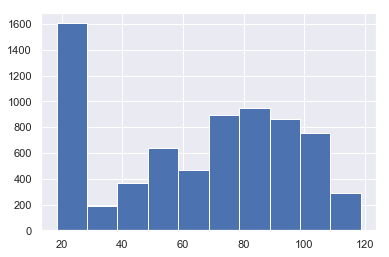

In [25]:
#6/1: nahradenie chýbajúcich hodnôt pre MonthlyCharges

p = data_telecom["MonthlyCharges"].hist()

In [26]:
MonthlyCharges_mean = data_telecom["MonthlyCharges"].mean()
MonthlyCharges_median = data_telecom["MonthlyCharges"].median()
print("MonthlyCharges mean: {0:.4f}, median: {1:.4f}".format(MonthlyCharges_mean, MonthlyCharges_median))

MonthlyCharges mean: 64.7075, median: 70.3000


In [41]:
ptable = pd.pivot_table(data_telecom, index="Tenure_ordinal", values=["MonthlyCharges", "TotalCharges"], aggfunc="mean", margins=True)
ptable

,MonthlyCharges,TotalCharges
Tenure_ordinal,,
<1 year,56.123212,276.621563
1-2 years,61.263480,1126.257520
2-4 years,65.869081,2390.451913
4-6 years,73.908091,4685.506364
All,64.744048,2281.148744


In [46]:
def replace_missing_MonthlyCharges(row):
    MonthlyCharges = row["MonthlyCharges"]
    Tenure_ordinal = row["Tenure_ordinal"]
    TotalCharges = row["TotalCharges"]
    if pd.isna(MonthlyCharges):
        return ptable["MonthlyCharges"][(Tenure_ordinal, TotalCharges)]
    else:
        return MonthlyCharges
    
data_telecom["MonthlyCharges"] = data_telecom.apply(replace_missing_MonthlyCharges, axis=1)

In [44]:
data_telecom["MonthlyCharges"].fillna(MonthlyCharges_mean, inplace=True)

In [47]:
data_telecom["MonthlyCharges"].isna().sum()

0

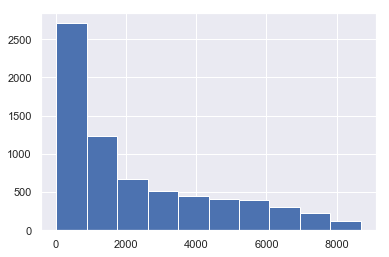

In [48]:
#6/2:odvodenie chýbajúcich hodnôt pre TotalCharges:

p = data_telecom["TotalCharges"].hist()

In [49]:
ptable = pd.pivot_table(data_telecom, index="Tenure_ordinal", values=["TotalCharges"], aggfunc=["median", "mean", "min", "max"], margins=True)
ptable

,median,mean,min,max
,TotalCharges,TotalCharges,TotalCharges,TotalCharges
Tenure_ordinal,,,,
<1 year,172.850,276.621563,18.80,1384.75
1-2 years,1148.550,1126.257520,218.55,2542.45
2-4 years,2402.575,2390.451913,383.65,5443.65
4-6 years,4991.500,4685.506364,900.90,8684.80
All,1397.475,2283.300441,18.80,8684.80


In [50]:
TotalCharges_mean = data_telecom["TotalCharges"].mean()
TotalCharges_median = data_telecom["TotalCharges"].median()
print("TotalCharges mean: {0:.4f}, median: {1:.4f}".format(TotalCharges_mean, TotalCharges_median))

TotalCharges mean: 2281.9169, median: 1397.4750


In [51]:
data_telecom["TotalCharges"].fillna(TotalCharges_median, inplace=True)
data_telecom["TotalCharges"].isna().sum()

0

In [52]:
#6/3: nahradenie chýbajúcich hodnôt v atribúte Dependents v závislosti od atribútov Gender a Partner.

pd.crosstab(index=[data_telecom["Gender"], data_telecom["Partner"]], columns=data_telecom["Dependents"])

Dependents        No  Yes
Gender Partner           
Female No       1656  144
       Yes       808  880
Male   No       1627  214
       Yes       850  864

In [53]:
data_telecom["Dependents"].value_counts()  

No     4941
Yes    2102
Name: Dependents, dtype: int64

In [54]:
#najfrekventovanejšia hodnota pre Dependents je "No", tak pre chýbajúce hodnoty tiež doplním "No"

data_telecom["Dependents"].fillna("No", inplace=True)
data_telecom["Dependents"].isna().sum()

0

In [55]:
data_telecom.isna().sum()

Gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
Tenure                     0
PhoneService               0
MultipleLines              0
InternetService            0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
MonthlyCharges_ordinal    26
TotalCharges_ordinal      11
Tenure_ordinal            11
dtype: int64

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [56]:
# YOUR CODE HERE
#7/1: vytvorenie nového atribútu TotalMonthCharges:

data_telecom["TotalMonthCharges"] = data_telecom.eval("MonthlyCharges * Tenure")
data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(18.15, 38.35]","(10.134, 1752.0]",<1 year,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,"(38.35, 58.45]","(1752.0, 3485.2]",2-4 years,1936.30
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(38.35, 58.45]","(10.134, 1752.0]",<1 year,107.70
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(38.35, 58.45]","(1752.0, 3485.2]",2-4 years,1903.50
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(58.45, 78.55]","(10.134, 1752.0]",<1 year,141.40


In [57]:
#7/1: vytvorenie nového atribútu TotalRatio:

def map_TotalMonthCharges(TotalMonthCharges):
    if {"TotalMonthCharges < TotalCharges"}:
        return "-1"
    elif {"TotalMonthCharges == TotalCharges"}:
        return "0"
    elif {"TotalMonthCharges > TotalCharges"}:
        return "+1"
    return TotalMonthCharges;

data_telecom["TotalRatio"] = data_telecom["TotalMonthCharges"].apply(map_TotalMonthCharges)
data_telecom["TotalRatio"].value_counts()

-1    7043
Name: TotalRatio, dtype: int64

In [58]:
data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,"(18.15, 38.35]","(10.134, 1752.0]",<1 year,29.85,-1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,"(38.35, 58.45]","(1752.0, 3485.2]",2-4 years,1936.30,-1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,"(38.35, 58.45]","(10.134, 1752.0]",<1 year,107.70,-1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,"(38.35, 58.45]","(1752.0, 3485.2]",2-4 years,1903.50,-1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,"(58.45, 78.55]","(10.134, 1752.0]",<1 year,141.40,-1


### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [59]:
# YOUR CODE HERE
#8/1: transformácia kategorických atribútov:

from sklearn.preprocessing import LabelEncoder

data_telecom['Gender'] = LabelEncoder().fit_transform(data_telecom['Gender'])
data_telecom['Partner'] = LabelEncoder().fit_transform(data_telecom['Partner'])
data_telecom['PhoneService'] = LabelEncoder().fit_transform(data_telecom['PhoneService'])
data_telecom['PaperlessBilling'] = LabelEncoder().fit_transform(data_telecom['PaperlessBilling'])
data_telecom['Churn'] = LabelEncoder().fit_transform(data_telecom['Churn'])

data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,0,0,1,No,1,0,No phone service,DSL,No,Yes,...,1,Electronic check,29.85,29.85,0,"(18.15, 38.35]","(10.134, 1752.0]",<1 year,29.85,-1
1,1,0,0,No,34,1,No,DSL,Yes,No,...,0,Mailed check,56.95,1889.50,0,"(38.35, 58.45]","(1752.0, 3485.2]",2-4 years,1936.30,-1
2,1,0,0,No,2,1,No,DSL,Yes,Yes,...,1,Mailed check,53.85,108.15,1,"(38.35, 58.45]","(10.134, 1752.0]",<1 year,107.70,-1
3,1,0,0,No,45,0,No phone service,DSL,Yes,No,...,0,Bank transfer (automatic),42.30,1840.75,0,"(38.35, 58.45]","(1752.0, 3485.2]",2-4 years,1903.50,-1
4,0,0,0,No,2,1,No,Fiber optic,No,No,...,1,Electronic check,70.70,151.65,1,"(58.45, 78.55]","(10.134, 1752.0]",<1 year,141.40,-1


In [60]:
#8/1: transformácia kategorických atribútov:

data_telecom = pd.get_dummies(data_telecom, columns=['InternetService', 'PaymentMethod',])
data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Tenure_ordinal,TotalMonthCharges,TotalRatio,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,No,1,0,No phone service,No,Yes,No,...,<1 year,29.85,-1,1,0,0,0,0,1,0
1,1,0,0,No,34,1,No,Yes,No,Yes,...,2-4 years,1936.30,-1,1,0,0,0,0,0,1
2,1,0,0,No,2,1,No,Yes,Yes,No,...,<1 year,107.70,-1,1,0,0,0,0,0,1
3,1,0,0,No,45,0,No phone service,Yes,No,Yes,...,2-4 years,1903.50,-1,1,0,0,1,0,0,0
4,0,0,0,No,2,1,No,No,No,No,...,<1 year,141.40,-1,0,1,0,0,0,1,0


In [61]:
#8/1: transformácia ordinálnych kategorických atribútov na numerické:

data_telecom['Contract'] = data_telecom['Contract'].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
data_telecom['Tenure_ordinal'] = data_telecom['Tenure_ordinal'].map({"<1 year": 0, "1-2 years": 1, "2-4 years": 2, "4-6 years": 3})
data_telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Tenure_ordinal,TotalMonthCharges,TotalRatio,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,No,1,0,No phone service,No,Yes,No,...,0.0,29.85,-1,1,0,0,0,0,1,0
1,1,0,0,No,34,1,No,Yes,No,Yes,...,2.0,1936.30,-1,1,0,0,0,0,0,1
2,1,0,0,No,2,1,No,Yes,Yes,No,...,0.0,107.70,-1,1,0,0,0,0,0,1
3,1,0,0,No,45,0,No phone service,Yes,No,Yes,...,2.0,1903.50,-1,1,0,0,1,0,0,0
4,0,0,0,No,2,1,No,No,No,No,...,0.0,141.40,-1,0,1,0,0,0,1,0


In [62]:
#8/2: normalizácia atribútov:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_telecom['TotalCharges'] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data_telecom['TotalCharges'])), columns=['TotalCharges'])
data_telecom['MonthlyCharges'] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data_telecom['MonthlyCharges'])), columns=['MonthlyCharges'])
data_telecom['TotalMonthCharges'] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data_telecom['TotalMonthCharges'])), columns=['TotalMonthCharges'])
normData = data_telecom
normData.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Tenure_ordinal,TotalMonthCharges,TotalRatio,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,No,1,0,No phone service,No,Yes,No,...,0.0,0.003491,-1,1,0,0,0,0,1,0
1,1,0,0,No,34,1,No,Yes,No,Yes,...,2.0,0.226468,-1,1,0,0,0,0,0,1
2,1,0,0,No,2,1,No,Yes,Yes,No,...,0.0,0.012596,-1,1,0,0,0,0,0,1
3,1,0,0,No,45,0,No phone service,Yes,No,Yes,...,2.0,0.222632,-1,1,0,0,1,0,0,0
4,0,0,0,No,2,1,No,No,No,No,...,0.0,0.016538,-1,0,1,0,0,0,1,0


In [63]:
#tvorba modelov: cieľový atribút bude "Churn" a maticu príznakov budú tvoriť zvyšné atribúty, ktoré som neodstránila - viď. nižšie

data_telecom = data_telecom.drop(columns=["Dependents", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Tenure_ordinal", "MonthlyCharges_ordinal", "TotalCharges_ordinal", "TotalRatio"])
data_telecom.head()

,Gender,SeniorCitizen,Partner,Tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalMonthCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,0,0,1,0.115423,0.001275,0,0.003491,1,0,0,0,0,1,0
1,1,0,0,34,1,1,0,0.385075,0.215867,0,0.226468,1,0,0,0,0,0,1
2,1,0,0,2,1,0,1,0.354229,0.010310,1,0.012596,1,0,0,0,0,0,1
3,1,0,0,45,0,1,0,0.239303,0.210241,0,0.222632,1,0,0,1,0,0,0
4,0,0,0,2,1,0,1,0.521891,0.015330,1,0.016538,0,1,0,0,0,1,0


### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [64]:
# YOUR CODE HERE
#9/1: rozdelenie dátovej množiny do matice príznakov a vektora hodnôt cieľového atribútu:

X_telecom = data_telecom.drop('Churn', axis=1)
y_telecom = data_telecom['Churn']

print(X_telecom.shape)
print(y_telecom.shape)

(7043, 17)
(7043,)


In [65]:
#9/2: rozdelenie dát di trénovacej a testovacej množiny v pomere 70/30:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_telecom, y_telecom, test_size=0.3, random_state=1)

### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [86]:
# YOUR CODE HERE
#k-NN model:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

model = KNeighborsClassifier(n_neighbors=25)
model.fit(X_train, y_train)

y_model = model.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_model)}")

Presnosť (accuracy) modelu: 0.7969711310932324


In [68]:
#pre model k-NN:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [69]:
print("Najlepšie parametre sú:")
print(grid.best_params_)
print(grid.best_score_)

Najlepšie parametre sú:
{'n_neighbors': 35}
0.7870182555780934


In [70]:
#pre model DecisionTree:
from sklearn.tree import DecisionTreeClassifier

criterion_range = ['gini', 'entropy']
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split_range = [2, 4, 8, 10]
min_samples_leaf_range = [1, 5, 10, 15]
presort_range = [True, False]

param_grid_dt = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range)

dtree = DecisionTreeClassifier()

grid_dt = GridSearchCV(estimator=dtree, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 4, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [71]:
print("Najlepšia kombinácia parametrov je:")
print(grid_dt.best_params_)
print("Hodnota presnosti modelu pri tejto kombinácii je:")
print(grid_dt.best_score_)

Najlepšia kombinácia parametrov je:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 8}
Hodnota presnosti modelu pri tejto kombinácii je:
0.7896551724137931


### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [72]:
#model k-NN:

model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train, y_train)

y_model = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_model)
print(cm)

[[1428  157]
 [ 260  268]]


In [73]:
print(grid.cv_results_["mean_test_score"][35])

0.7866125760649088


In [74]:
print("Jednotlivé skóre pre jednotlivé hodnoty parametra k:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, std, params in zip(means, stds, params):
    print("%0.3f (+/-%0.03f) pre hodnotu %s" % (mean, std, params))
print()

Jednotlivé skóre pre jednotlivé hodnoty parametra k:
0.725 (+/-0.006) pre hodnotu {'n_neighbors': 1}
0.753 (+/-0.015) pre hodnotu {'n_neighbors': 2}
0.755 (+/-0.020) pre hodnotu {'n_neighbors': 3}
0.763 (+/-0.015) pre hodnotu {'n_neighbors': 4}
0.762 (+/-0.017) pre hodnotu {'n_neighbors': 5}
0.769 (+/-0.012) pre hodnotu {'n_neighbors': 6}
0.768 (+/-0.018) pre hodnotu {'n_neighbors': 7}
0.779 (+/-0.020) pre hodnotu {'n_neighbors': 8}
0.772 (+/-0.017) pre hodnotu {'n_neighbors': 9}
0.778 (+/-0.018) pre hodnotu {'n_neighbors': 10}
0.775 (+/-0.018) pre hodnotu {'n_neighbors': 11}
0.775 (+/-0.017) pre hodnotu {'n_neighbors': 12}
0.770 (+/-0.017) pre hodnotu {'n_neighbors': 13}
0.775 (+/-0.021) pre hodnotu {'n_neighbors': 14}
0.774 (+/-0.020) pre hodnotu {'n_neighbors': 15}
0.775 (+/-0.018) pre hodnotu {'n_neighbors': 16}
0.775 (+/-0.017) pre hodnotu {'n_neighbors': 17}
0.778 (+/-0.018) pre hodnotu {'n_neighbors': 18}
0.778 (+/-0.020) pre hodnotu {'n_neighbors': 19}
0.781 (+/-0.019) pre hodn

Text(0, 0.5, 'Presnost modelu')

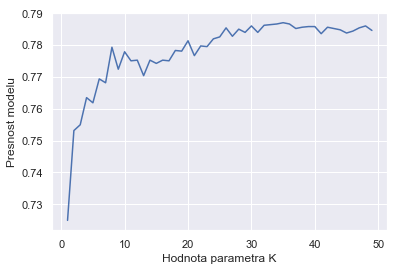

In [75]:
plt.plot(k_range, means)
plt.xlabel('Hodnota parametra K')
plt.ylabel('Presnost modelu')

In [76]:
#model DecisionTree:

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8)
dtree.fit(X_train, y_train)
y_dtree=dtree.predict(X_test)

print(confusion_matrix(y_test, y_dtree))

[[1425  160]
 [ 263  265]]


Text(0, 0.5, 'Presnost modelu')

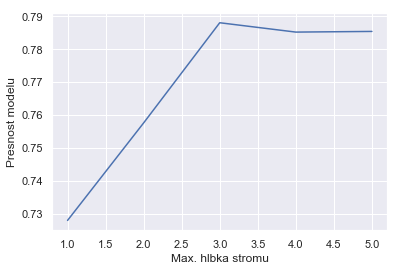

In [87]:
max_depth_range = [1, 2, 3, 4, 5]

param_grid_dt = dict(max_depth=max_depth_range)

dtree2 = DecisionTreeClassifier()

grid_dt = GridSearchCV(estimator=dtree2, param_grid=param_grid_dt, cv=10, scoring='accuracy')
grid_dt.fit(X_train, y_train)

plt.plot(max_depth_range, grid_dt.cv_results_["mean_test_score"])
plt.xlabel('Max. hlbka stromu')
plt.ylabel('Presnost modelu')

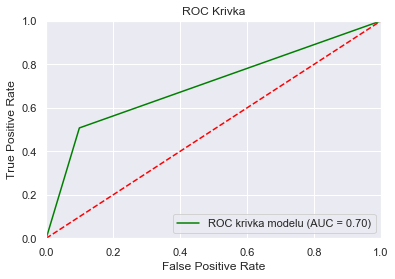

In [79]:
# YOUR CODE HERE
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_model, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('ROC Krivka')
plt.plot(fpr, tpr, color='green', label = 'ROC krivka modelu (AUC = %0.2f)' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [80]:
# YOUR CODE HERE
#pre k-NN model:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_model)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_model)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_model)}")

cm = confusion_matrix(y_test, y_model2)
print(cm)

Presnosť (accuracy) modelu: 0.8026502602934217
Presnosť (precision) modelu: 0.6305882352941177
Návratnosť (recall) modelu: 0.5075757575757576
[[1396  189]
 [ 240  288]]


In [83]:
#pre rozhodovacie stromy:

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_dtree)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_dtree)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_dtree)}")

cm_dt = confusion_matrix(y_test, y_dtree)
print(cm_dt)

Presnosť (accuracy) modelu: 0.7998106956933271
Presnosť (precision) modelu: 0.6235294117647059
Návratnosť (recall) modelu: 0.5018939393939394
[[1425  160]
 [ 263  265]]


In [ ]:
#k-NN model predikuje/deteguje lepšie zákazníkov, ktorí odídu

In [88]:
#vykreslenie modelu rozhodovac9ch stromov:

from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dtree, feature_names=X_telecom.columns.values, class_names=['0', '1'], out_file=f)

In [ ]:
#identifikácia odchádzajúcivh zákazníkov na základe atribútu "Contract", tí čo majú Month-to-Month, je väčšia pravdepodobnosť, že odídu
#potvrdenie kontingečnou tabuľkou:

In [89]:
pd.pivot_table(data_telecom, index="Contract", values="Churn", aggfunc="mean")

,Churn
Contract,
0,0.427097
1,0.112695
2,0.028319
